In [2]:
import pandas as pd
list_file = ['data_to_page_49','data_page_50_to_69','data_page_70_to_99','data_page_100_to_140']
df = pd.concat([pd.read_csv(f"Data/{fi}.csv",index_col=0) for fi in list_file], axis=0)


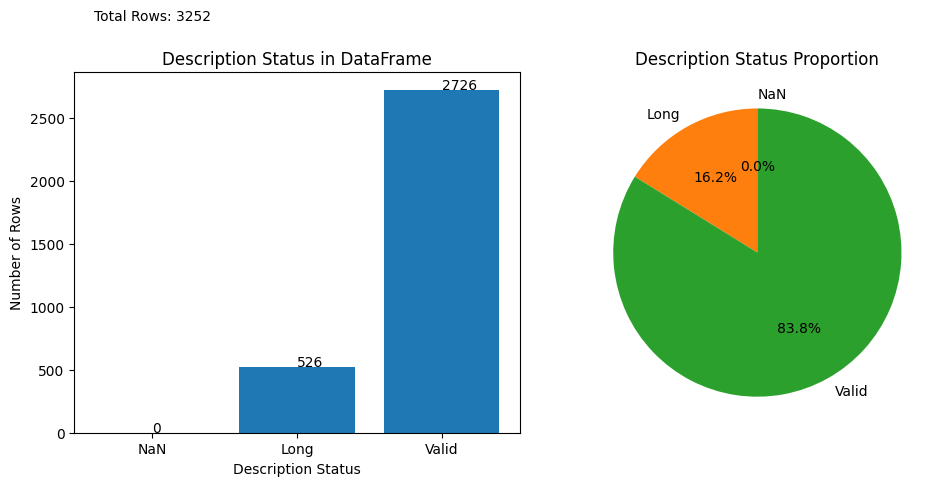

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Đếm số lượng dòng có Description là NaN
nan_description_count = df['Description'].isnull().sum()
# print(df['Description'].isnull())

# Đếm số lượng dòng có Description lớn hơn 4000 kí tự
long_description_count = df[df['Description'].str.len() > 4000].shape[0]

# Đếm số lượng dòng có Description hợp lệ
valid_description_count = len(df) - nan_description_count - long_description_count

# Tổng số lượng dòng
total_rows = len(df)

# Tạo danh sách giá trị và nhãn cho biểu đồ pie
pie_values = [nan_description_count, long_description_count, valid_description_count]
pie_labels = ['NaN', 'Long', 'Valid']

# Tính toán tỉ lệ phần trăm trên tổng số dòng
percentage_values = [count / total_rows * 100 for count in pie_values]

# Visualize kết quả với biểu đồ bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ bar
ax1.bar(pie_labels, pie_values)
ax1.set_xlabel('Description Status')
ax1.set_ylabel('Number of Rows')
ax1.set_title('Description Status in DataFrame')

# Biểu đồ pie
ax2.pie(percentage_values, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Description Status Proportion')

# Hiển thị tổng số lượng
ax1.text(0, total_rows, f"Total Rows: {total_rows}", ha='center', va='bottom')

for i in range(len(pie_labels)):
    ax1.text(pie_labels[i], pie_values[i], str(pie_values[i]))

plt.tight_layout()
plt.show()


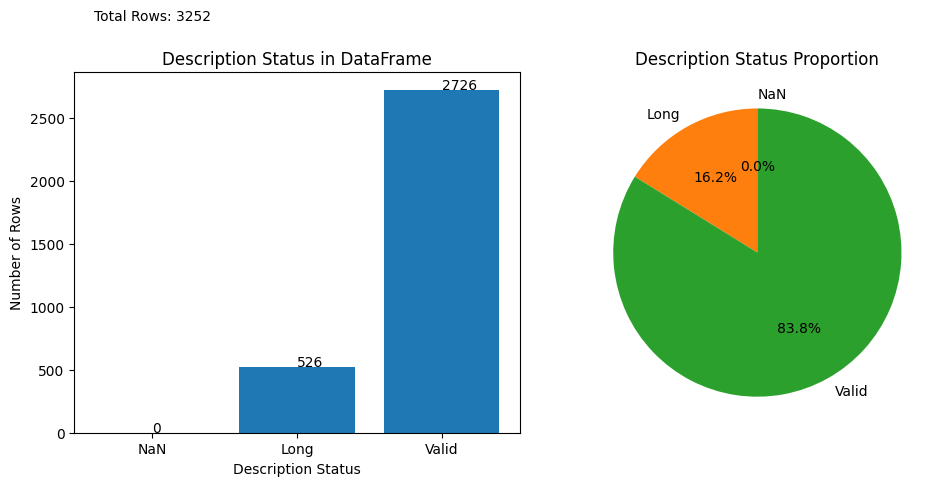

In [4]:
df2 = df
non_string_indices = df2[~df2['Description'].apply(lambda x: isinstance(x, str))].index
df2.drop(non_string_indices, inplace = True)
df2["Description"] = df2["Description"].apply(lambda x: x.split("***")[0])


nan_description_count = df2['Description'].isnull().sum()

# Đếm số lượng dòng có Description lớn hơn 4000 kí tự
long_description_count = df2[df2['Description'].str.len() > 4000].shape[0]

# Đếm số lượng dòng có Description hợp lệ
valid_description_count = len(df2) - nan_description_count - long_description_count

# Tổng số lượng dòng
total_rows = len(df2)

# Tạo danh sách giá trị và nhãn cho biểu đồ pie
pie_values = [nan_description_count, long_description_count, valid_description_count]
pie_labels = ['NaN', 'Long', 'Valid']

# Tính toán tỉ lệ phần trăm trên tổng số dòng
percentage_values = [count / total_rows * 100 for count in pie_values]

# Visualize kết quả với biểu đồ bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ bar
ax1.bar(pie_labels, pie_values)
ax1.set_xlabel('Description Status')
ax1.set_ylabel('Number of Rows')
ax1.set_title('Description Status in DataFrame')

# Biểu đồ pie
ax2.pie(percentage_values, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Description Status Proportion')

# Hiển thị tổng số lượng
ax1.text(0, total_rows, f"Total Rows: {total_rows}", ha='center', va='bottom')

for i in range(len(pie_labels)):
    ax1.text(pie_labels[i], pie_values[i], str(pie_values[i]))

plt.tight_layout()
plt.show()



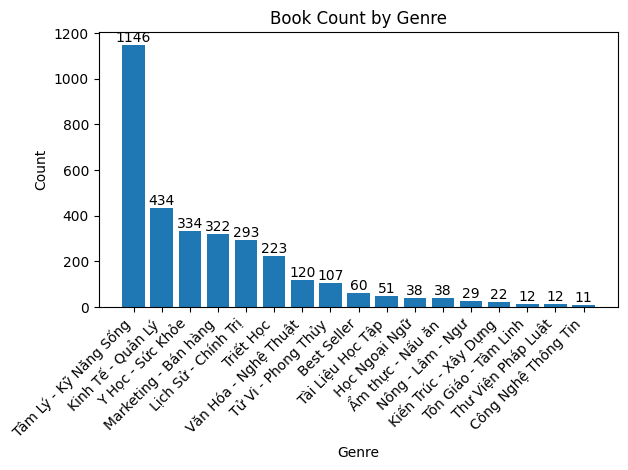

In [5]:

# Đếm số lượng sách theo thể loại (Genre)
genre_counts = df2['Genre'].value_counts()

# Visualize kết quả
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Book Count by Genre')

plt.xticks(rotation=45, ha='right')  # Điều chỉnh vị trí và góc của nhãn trên trục x
for i, count in enumerate(genre_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [6]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'ODBC Driver 18 for SQL Server']


In [7]:
import pyodbc

# Kết nối đến cơ sở dữ liệu SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=LAPTOP-9HPU6J99;'
    'DATABASE=BOOK_RECOMMENDATION;'
    'UID=admin;'
    'PWD=123;'
    # 'TrustServerCertificate=No;'
    'TrustServerCertificate=Yes'
)


'install' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
df = df2

cursor = conn.cursor()

for index,data in df.iterrows():

    x = data["Description"]
    if len(x)>4000:
        count +=1
        continue
    insert_query = '''
        INSERT INTO books (title, link, genre, author, description)
        VALUES (?, ?, ?, ?, ?)
    '''
    values = (data['Title'], data['Link'], data['Genre'], data['Author'], x)
    cursor.execute(insert_query, values)
    conn.commit()
    
cursor.close()
conn.close()